<a href="https://colab.research.google.com/github/vidhi-sys/PyTorch_DeepLearning_TensorFlow/blob/main/Pytorch_workflow02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn # nn contains all of pyrotchs nueral networks building block

[Vedio Followed ](https://youtu.be/Z_ikDlimN6A)

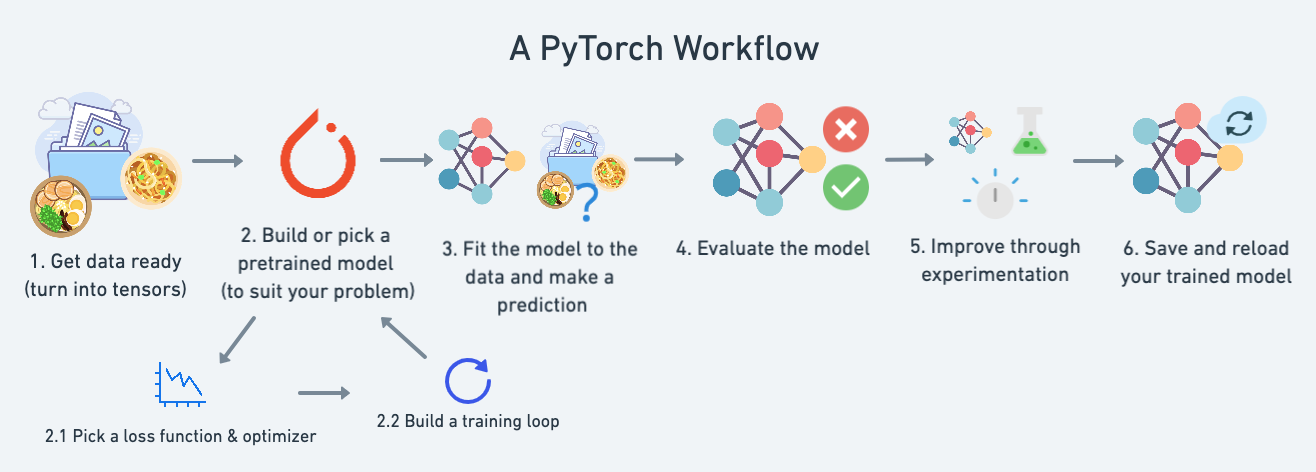

#  1. Data Preparing and Loading

In [124]:
torch.__version__

'2.8.0+cu126'

In [125]:
# using linear regression formulas with known parameters
weight = 0.9
bias = 0.3
# w and b are known we create model that estimates these parameters
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
len(X), len(y)

(50, 50)

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# 2. Build A Model

In [127]:
def graph(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="r",s=4,label="Training Data")
  plt.scatter(test_data,test_labels,c="b",s=4,label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="g",s=4,label="Predictions")

  plt.legend(prop={"size":14});


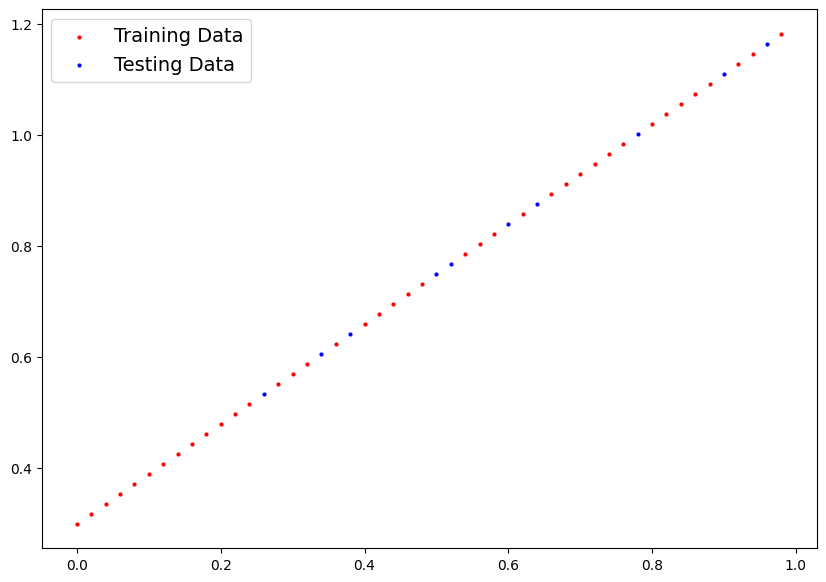

In [128]:
graph();

In [129]:
class linear_model(nn.Module):
  def __init__(self):#constructor
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
  def forward(self,X:torch.Tensor)->torch.Tensor:
    #forward is what computation our model does
    return self.weights * X + self.bias


# Model Building Essentials


*   torch.nn ->contains building blocks for compuatonal graph

*   torch.nn.module->base class for all nn modules if u subclass u should   ovveride fwd method

* torch.optim->optimises in pytorch live helping with gradient descent*




In [130]:
# Create a Random Seed doesnt get diff values everytime
torch.manual_seed(72)
# Create an instance of  Linear Model
model_0 = linear_model()
list(model_0.parameters())


[Parameter containing:
 tensor([-1.0001], requires_grad=True),
 Parameter containing:
 tensor([-0.7250], requires_grad=True)]

In [131]:
model_0.state_dict()

OrderedDict([('weights', tensor([-1.0001])), ('bias', tensor([-0.7250]))])

### Making Predictions `torch.inference_mode()`

In [132]:
with torch.inference_mode():
  y_pred=model_0(X_test)
y_pred

tensor([[-0.9851],
        [-1.5051],
        [-1.3251],
        [-1.6251],
        [-1.0651],
        [-1.6851],
        [-1.2451],
        [-1.2251],
        [-1.3651],
        [-1.1051]])

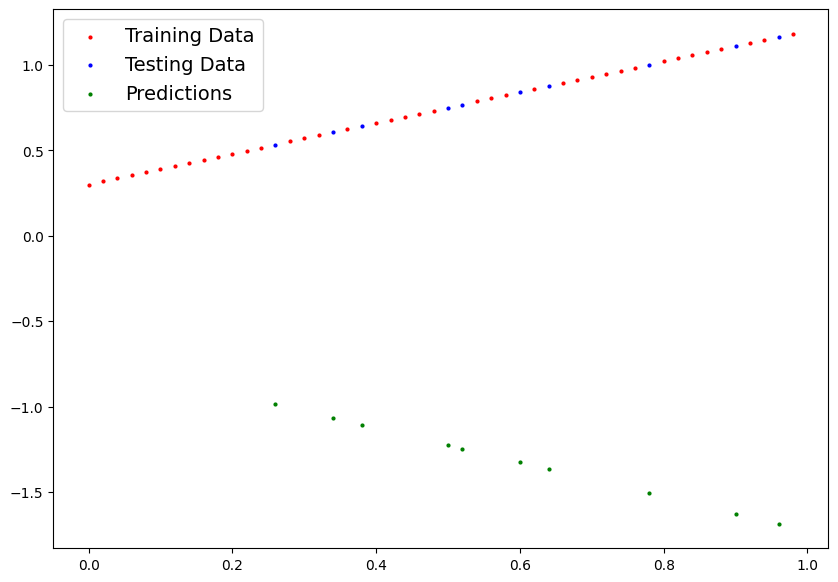

In [133]:
graph(predictions=y_pred)

In [134]:
# Training our model by moving these poor representation of data to a better representation of data

import torch
import torch.nn as nn
loss=nn.L1Loss()
loss(y_pred,y_test)


tensor(2.1423)

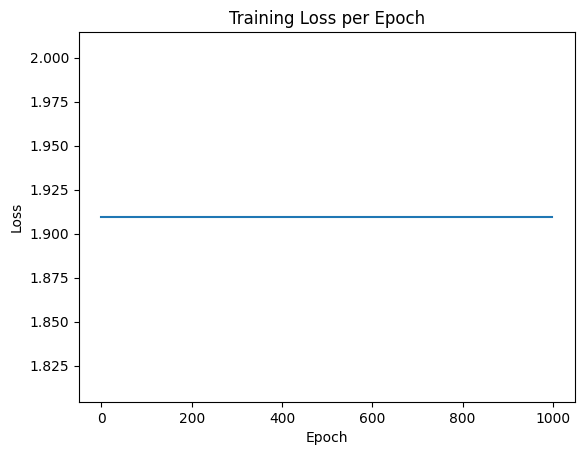

In [135]:
loss_values = [] # Create a list to store loss values
for epoch in range(1000):
    # Set the model to training mode
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = nn.L1Loss()(y_pred, y_train)
    loss_values.append(loss.item())



plt.plot(loss_values)

plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [136]:
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)
# change parameters that decreases the loss


# Building a Training - Testing Loop


1.    loop thru the data
2.    forward pass/propagation (this involves data moving thru our models    forward() fxn)
3.    calculate Loss
4.    optimizer zero grad
5.    loss backwards
6.    optimizer step
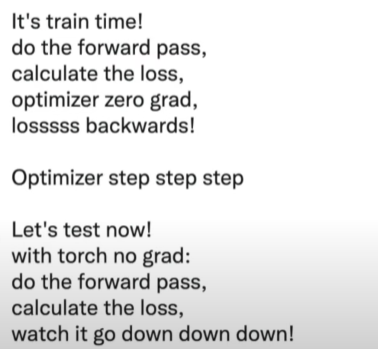




In [137]:
# epochs loops thru data
epochs=500
#tracking all values in list
epoch_count=[]
loss_values=[]
test_loss_values=[]
# hyperparamter
for epoch in range(epochs):
  # set model to training mode
  model_0.train()
  # forward pass
  y_pred=model_0(X_train)
  loss=nn.L1Loss()(y_pred,y_train)
  # loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred=model_0(X_test)
    test_loss=nn.L1Loss()(test_pred,y_test)
    if(epoch%10==0):
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")


print(model_0.state_dict())

Epoch: 0 | Loss: 1.9095 | Test Loss: 2.1296
Epoch: 10 | Loss: 1.7879 | Test Loss: 2.0022
Epoch: 20 | Loss: 1.6662 | Test Loss: 1.8748
Epoch: 30 | Loss: 1.5445 | Test Loss: 1.7475
Epoch: 40 | Loss: 1.4229 | Test Loss: 1.6201
Epoch: 50 | Loss: 1.3012 | Test Loss: 1.4927
Epoch: 60 | Loss: 1.1795 | Test Loss: 1.3653
Epoch: 70 | Loss: 1.0579 | Test Loss: 1.2380
Epoch: 80 | Loss: 0.9362 | Test Loss: 1.1106
Epoch: 90 | Loss: 0.8145 | Test Loss: 0.9832
Epoch: 100 | Loss: 0.6929 | Test Loss: 0.8559
Epoch: 110 | Loss: 0.5834 | Test Loss: 0.7360
Epoch: 120 | Loss: 0.5019 | Test Loss: 0.6327
Epoch: 130 | Loss: 0.4415 | Test Loss: 0.5443
Epoch: 140 | Loss: 0.3977 | Test Loss: 0.4696
Epoch: 150 | Loss: 0.3653 | Test Loss: 0.4067
Epoch: 160 | Loss: 0.3386 | Test Loss: 0.3570
Epoch: 170 | Loss: 0.3180 | Test Loss: 0.3164
Epoch: 180 | Loss: 0.3020 | Test Loss: 0.2843
Epoch: 190 | Loss: 0.2879 | Test Loss: 0.2586
Epoch: 200 | Loss: 0.2752 | Test Loss: 0.2395
Epoch: 210 | Loss: 0.2651 | Test Loss: 0.2241

In [138]:
#calculate the loss
loss=nn.L1Loss()(y_pred,y_train)
loss
# difff b/w ideal train and our models predicted output


tensor(0.0975, grad_fn=<MeanBackward0>)

In [139]:
# optimizer zero grad
optimizer.zero_grad()
# by default how optimizer changes will accumualte thru loop

In [140]:
# loss backwards / back propagation on the loss wrt the paramteres
# loss.backward() # Removed redundant call

In [141]:
# optimizer perform gradient descent
# optimizer.step() # Removed redundant call

# Comparing the caculated weight and bias to our orignals


In [142]:
with torch.inference_mode():
  y_pred_new=model_0(X_test)


In [143]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5336])), ('bias', tensor([0.4830]))])

In [144]:
weight , bias

(0.9, 0.3)

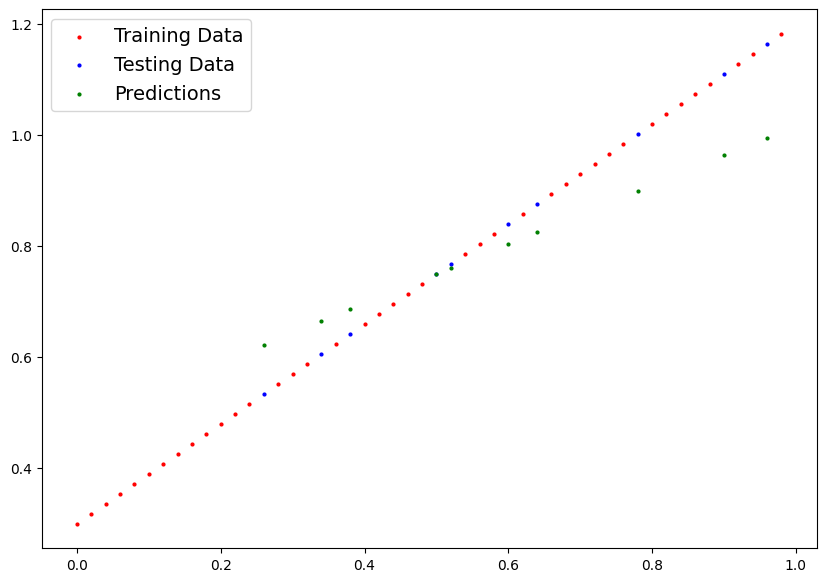

In [145]:
graph(predictions=y_pred_new)
#very close to the ideal one i.e. reduced distance MAE


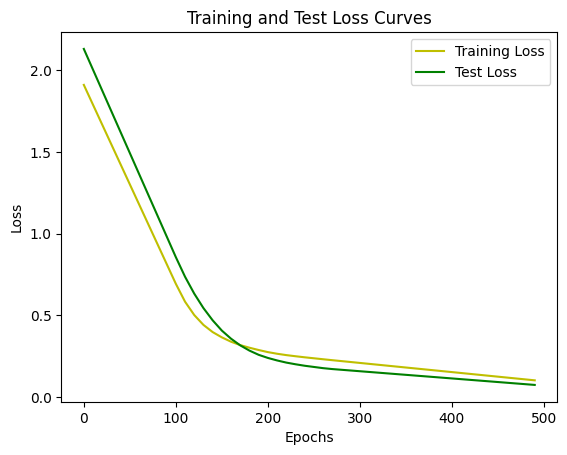

In [150]:
#plotting the loss curve
plt.plot(epoch_count,torch.tensor(loss_values).numpy(),label="Training Loss",c="y")
plt.plot(epoch_count,torch.tensor(test_loss_values).numpy(),label="Test Loss",c="g")
plt.title("Training and Test Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Saving Our Model

* `torch.save ()`-in pickle format
* `torch.load()`- allows you to load saved pytorch  model
* `torch.nn.Module.load_state_dict()`- loads the saved imp things in dict



In [156]:
from pathlib import Path
path=Path("models")
path.mkdir(parents=True,exist_ok=True)
model_name="01_pytorch_workflow.pth"
save_path=path/model_name
torch.save(obj=model_0.state_dict(),f=save_path)
